In [1]:
import os
from tqdm import tqdm
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2
import random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!pip install opendatasets
import opendatasets as od
od.download('https://www.kaggle.com/competitions/bengaliai-cv19')
od.download('https://www.kaggle.com/datasets/imthebaron/bengali-ai-grapehem-classification-models')
od.download('https://www.kaggle.com/datasets/pestipeti/bengaliai')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: imthebaron
Your Kaggle Key: ··········


100%|██████████| 3.88G/3.88G [00:54<00:00, 75.7MB/s]



Extracting archive ./bengaliai-cv19/bengaliai-cv19.zip to ./bengaliai-cv19
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: imthebaron
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/imthebaron/bengali-ai-grapehem-classification-models


100%|██████████| 389M/389M [00:07<00:00, 57.4MB/s]



Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: imthebaron
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/pestipeti/bengaliai


100%|██████████| 1.91G/1.91G [00:24<00:00, 83.6MB/s]


In [4]:
model = keras.models.load_model('/content/bengali-ai-grapehem-classification-models/bengali.ai custom grayscale.h5')
model.summary()

Model: "bengali.ai"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 64, 64, 1)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv2d          │ (None, 64, 64, 32)     │             73 │ input_layer[0][0]      │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv2d_1        │ (None, 64, 64, 32)     │          1,344 │ separable_conv2d[0][0] │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 64, 64, 32)     │            128 │ separable_conv2d_1[0]… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 32, 32, 32)     │              0 │ batch_normalization[0… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 32, 32, 32)     │              0 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv2d_2        │ (None, 32, 32, 64)     │          2,400 │ dropout[0][0]          │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv2d_3        │ (None, 32, 32, 64)     │          4,736 │ separable_conv2d_2[0]… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 32, 32, 64)     │            256 │ separable_conv2d_3[0]… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 16, 16, 64)     │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv2d_4        │ (None, 16, 16, 128)    │          8,896 │ max_pooling2d_1[0][0]  │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv2d_5        │ (None, 16, 16, 128)    │         17,664 │ separable_conv2d_4[0]… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 16, 16, 128)    │            512 │ separable_conv2d_5[0]… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 8, 8, 128)      │              0 │ batch_normalization_2… │
│ (MaxPooling2D)       

 Total params: 684,005 (2.61 MB)

 Trainable params: 680,483 (2.60 MB)

 Non-trainable params: 3,520 (13.75 KB)

 Optimizer params: 2 (12.00 B)

In [220]:
load_dir = 'bengaliai/256_train/256/'

test = pd.read_csv('bengaliai-cv19/train.csv')
test.head()

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
0,Train_0,15,9,5,ক্ট্রো
1,Train_1,159,0,0,হ
2,Train_2,22,3,5,খ্রী
3,Train_3,53,2,2,র্টি
4,Train_4,71,9,5,থ্রো


In [221]:
test['filename'] = test.image_id.apply(lambda filename: load_dir + filename + '.png')
test = test[50000:100000]
len(test)

50000

In [222]:
test.head()

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme,filename
50000,Train_50000,31,2,0,ঙি,bengaliai/256_train/256/Train_50000.png
50001,Train_50001,13,4,2,র্কু,bengaliai/256_train/256/Train_50001.png
50002,Train_50002,122,0,4,য্য,bengaliai/256_train/256/Train_50002.png
50003,Train_50003,103,1,5,ফ্রা,bengaliai/256_train/256/Train_50003.png
50004,Train_50004,47,1,0,জ্বা,bengaliai/256_train/256/Train_50004.png


In [223]:
test = test.drop(columns=['image_id', 'grapheme'])
test = test[['filename', 'grapheme_root', 'vowel_diacritic', 'consonant_diacritic']]
test.head()

,filename,grapheme_root,vowel_diacritic,consonant_diacritic
50000,bengaliai/256_train/256/Train_50000.png,31,2,0
50001,bengaliai/256_train/256/Train_50001.png,13,4,2
50002,bengaliai/256_train/256/Train_50002.png,122,0,4
50003,bengaliai/256_train/256/Train_50003.png,103,1,5
50004,bengaliai/256_train/256/Train_50004.png,47,1,0


In [224]:
DIR = '/content/bengaliai-cv19'

In [225]:
test_0_df = pd.read_parquet('/content/bengaliai-cv19/test_image_data_0.parquet')
test_1_df = pd.read_parquet('/content/bengaliai-cv19/test_image_data_1.parquet')
test_2_df = pd.read_parquet('/content/bengaliai-cv19/test_image_data_0.parquet')
test_3_df = pd.read_parquet('/content/bengaliai-cv19/test_image_data_0.parquet')

In [226]:
#test_0_df.head()
#test_1_df.head()
#test_2_df.head()
#test_3_df.head()

In [227]:
test_df = pd.concat([test_0_df, test_1_df, test_2_df, test_3_df], ignore_index=True)

In [228]:
test_df.head()

,image_id,0,1,2,3,4,5,6,7,8,...,32322,32323,32324,32325,32326,32327,32328,32329,32330,32331
0,Test_0,247,253,253,252,252,252,252,253,253,...,254,254,254,254,254,254,253,253,252,250
1,Test_1,253,253,253,253,253,253,253,253,253,...,255,255,255,255,255,255,255,255,255,255
2,Test_2,253,253,253,253,253,252,251,252,252,...,255,255,255,255,255,255,255,254,253,252
3,Test_3,199,227,236,241,238,242,245,243,243,...,222,222,226,224,222,227,220,208,194,136
4,Test_4,243,246,251,252,251,249,250,250,251,...,251,252,252,252,252,253,253,253,253,253


In [229]:
test_df.drop('image_id', axis=1, inplace=True)

In [230]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,32322,32323,32324,32325,32326,32327,32328,32329,32330,32331
0,247,253,253,252,252,252,252,253,253,250,...,254,254,254,254,254,254,253,253,252,250
1,253,253,253,253,253,253,253,253,253,253,...,255,255,255,255,255,255,255,255,255,255
2,253,253,253,253,253,252,251,252,252,252,...,255,255,255,255,255,255,255,254,253,252
3,199,227,236,241,238,242,245,243,243,245,...,222,222,226,224,222,227,220,208,194,136
4,243,246,251,252,251,249,250,250,251,252,...,251,252,252,252,252,253,253,253,253,253


In [231]:
class_map = pd.read_csv('/content/bengaliai-cv19/class_map.csv')

In [232]:
class_map

,component_type,label,component
0,grapheme_root,0,ং
1,grapheme_root,1,ঃ
2,grapheme_root,2,অ
3,grapheme_root,3,আ
4,grapheme_root,4,ই
...,...,...,...
181,consonant_diacritic,2,র্
182,consonant_diacritic,3,র্য
183,consonant_diacritic,4,্য
184,consonant_diacritic,5,্র


In [297]:
grouped = class_map.groupby('component_type')

# Create sub-DataFrames
grapheme_root_df = grouped.get_group('grapheme_root')
vowel_diacritic_df = grouped.get_group('vowel_diacritic')
consonant_diacritic_df = grouped.get_group('consonant_diacritic')

# Display the sub-DataFrames
print("Grapheme Root DataFrame:")
print(grapheme_root_df)

print("\nConsonant Diacritic DataFrame:")
print(consonant_diacritic_df)

print("\nvowel Diacritic DataFrame:")
print(vowel_diacritic_df)

Grapheme Root DataFrame:
    component_type  label component
0    grapheme_root      0         ং
1    grapheme_root      1         ঃ
2    grapheme_root      2         অ
3    grapheme_root      3         আ
4    grapheme_root      4         ই
..             ...    ...       ...
163  grapheme_root    163       হ্ল
164  grapheme_root    164         ৎ
165  grapheme_root    165         ড়
166  grapheme_root    166         ঢ়
167  grapheme_root    167         য়

[168 rows x 3 columns]

Consonant Diacritic DataFrame:
          component_type  label component
179  consonant_diacritic      0         0
180  consonant_diacritic      1         ঁ
181  consonant_diacritic      2        র্
182  consonant_diacritic      3       র্য
183  consonant_diacritic      4        ্য
184  consonant_diacritic      5        ্র
185  consonant_diacritic      6      ্র্য

vowel Diacritic DataFrame:
      component_type  label component
168  vowel_diacritic      0         0
169  vowel_diacritic      1         া
170  vowe

In [298]:
grapheme_root_df.drop('component_type', axis=1, inplace=True)
vowel_diacritic_df.drop('component_type', axis=1, inplace=True)
consonant_diacritic_df.drop('component_type', axis=1, inplace=True)

<ipython-input-298-a74b6ea9aa43>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grapheme_root_df.drop('component_type', axis=1, inplace=True)
<ipython-input-298-a74b6ea9aa43>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vowel_diacritic_df.drop('component_type', axis=1, inplace=True)
<ipython-input-298-a74b6ea9aa43>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consonant_diacritic_df.drop('component_type', axis=1, inplace=True)

In [299]:
grapheme, vowel, consonant = grapheme_root_df.to_numpy(), vowel_diacritic_df.to_numpy(), consonant_diacritic_df.to_numpy()

In [300]:
grapheme[:10]

array([[0, 'ং'],
       [1, 'ঃ'],
       [2, 'অ'],
       [3, 'আ'],
       [4, 'ই'],
       [5, 'ঈ'],
       [6, 'উ'],
       [7, 'ঊ'],
       [8, 'ঋ'],
       [9, 'এ']], dtype=object)

In [301]:
vowel[:10]

array([[0, '0'],
       [1, 'া'],
       [2, 'ি'],
       [3, 'ী'],
       [4, 'ু'],
       [5, 'ূ'],
       [6, 'ৃ'],
       [7, 'ে'],
       [8, 'ৈ'],
       [9, 'ো']], dtype=object)

In [302]:
consonant[:10]

array([[0, '0'],
       [1, 'ঁ'],
       [2, 'র্'],
       [3, 'র্য'],
       [4, '্য'],
       [5, '্র'],
       [6, '্র্য']], dtype=object)

In [263]:
test_df.shape

(12, 32332)

In [264]:
import cv2
import numpy as np

def get_pad_width(im, new_shape, is_rgb=True):
    pad_diff = new_shape - np.array(im.shape[:2])
    t, b = pad_diff[0] // 2, (pad_diff[0] + 1) // 2
    l, r = pad_diff[1] // 2, (pad_diff[1] + 1) // 2
    return ((t, b), (l, r), (0, 0)) if is_rgb else ((t, b), (l, r))

def crop_object(img, thresh=220, maxval=255, square=True):
    # Check if the image is grayscale and convert to RGB
    if img.ndim == 2:  # Grayscale image
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh_gray = cv2.threshold(gray, thresh, maxval, cv2.THRESH_BINARY_INV)
    contours, _ = cv2.findContours(thresh_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:  # Check if contours are found
        x, y, w, h = max([cv2.boundingRect(c) for c in contours], key=lambda b: b[2]*b[3])
        crop = img[y:y+h, x:x+w]

        if square:
            pad_width = get_pad_width(crop, max(crop.shape[:2]), is_rgb=True)
            crop = np.pad(crop, pad_width=pad_width, mode='constant', constant_values=255)

        return crop
    else:
        return img  # Return original image if no contours are found


In [265]:
first_row = test_df.iloc[4]
first_row = first_row.to_numpy()
print(first_row)

[243 246 251 ... 253 253 253]


In [266]:
first_row = np.array(first_row)
first_row.resize((137, 236))
print(first_row)

[[243 246 251 ... 249 249 250]
 [252 253 253 ... 252 252 251]
 [252 252 252 ... 252 251 251]
 ...
 [249 251 252 ... 253 253 253]
 [247 252 252 ... 253 253 253]
 [250 252 253 ... 253 253 253]]


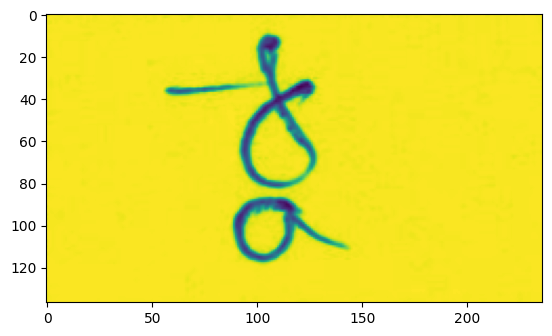

In [267]:
plt.imshow(first_row)

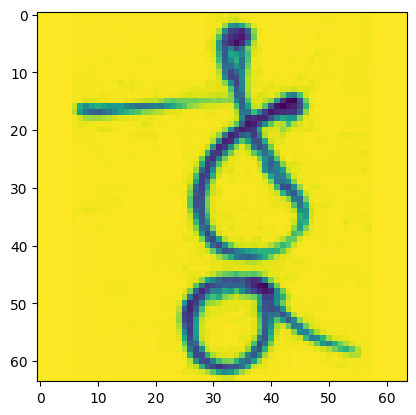

In [268]:
resized_image = crop_object(first_row, 250)
resized_image = cv2.resize(resized_image, (64, 64))
resized_image = cv2.cvtColor(resized_image, cv2.COLOR_RGB2GRAY)
resized_image = resized_image / 255.
resized_image.shape
plt.imshow(resized_image)

In [269]:
pred = model.predict(np.expand_dims(resized_image, axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [270]:
# pred

In [283]:
grapheme_pred = pred[0]  # Predictions for grapheme
vowel_pred = pred[1]      # Predictions for vowel
consonant_pred = pred[2]  # Predictions for consonant

# Convert predictions to class labels (if needed)
grapheme_label = np.argmax(grapheme_pred, axis=-1)
vowel_label = np.argmax(vowel_pred, axis=-1)
consonant_label = np.argmax(consonant_pred, axis=-1)

# Display the predictions
print("Grapheme Prediction:", grapheme_pred)
print("Vowel Prediction:", vowel_pred)
print("Consonant Prediction:", consonant_pred)

# Display the predicted class labels
print("Grapheme Class Label:", grapheme_label)
print("Vowel Class Label:", vowel_label)
print("Consonant Class Label:", consonant_label)

print("Grapheme Label:", grapheme[grapheme_label[0]])
print("Vowel Label:", vowel[vowel_label[0]])
print("Consonant Label:", consonant[consonant_label[0]])

Grapheme Prediction: [[1.13185313e-04 3.26987309e-03 7.25966842e-09 7.32660936e-08
  2.58041458e-04 4.82708720e-06 1.08397908e-04 9.41620510e-06
  2.86310751e-07 2.82256624e-05 8.11645577e-08 1.24722271e-06
  9.76010952e-08 2.08706548e-03 1.36231790e-06 6.88880664e-06
  8.24690972e-07 6.88709906e-06 1.33879337e-06 1.08460917e-07
  6.25414742e-08 1.56195341e-07 1.05258317e-04 2.01944626e-04
  1.05815889e-06 2.28230601e-06 2.22806420e-07 4.07597476e-08
  2.15743530e-05 9.78903146e-04 1.32951538e-06 1.32145756e-03
  2.96370508e-05 1.72862883e-06 1.63355409e-07 2.74126648e-07
  1.51598579e-04 1.58370412e-07 8.27343836e-02 2.15097825e-04
  3.20693380e-06 1.55266751e-08 8.94455891e-03 1.55012659e-03
  1.93084397e-05 1.31059687e-06 3.68357775e-07 1.64493554e-06
  4.54502187e-05 1.06001437e-06 1.72047323e-04 5.81057975e-06
  1.14527916e-06 2.86116749e-01 2.22842791e-05 4.77902204e-01
  2.99786829e-04 2.14517840e-07 1.32535689e-03 1.16581017e-04
  5.22537157e-04 1.79495019e-05 1.62565382e-04 4.

IndexError: invalid index to scalar variable.

In [284]:
def getImg(df):
  images = []
  for i in range(df.shape[0]):
    first_row = test_df.iloc[i]
    first_row = first_row.to_numpy()
    first_row = np.array(first_row)
    first_row.resize((137, 236))
    resized_image = crop_object(first_row, 250)
    resized_image = cv2.resize(resized_image, (64, 64))
    resized_image = cv2.cvtColor(resized_image, cv2.COLOR_RGB2GRAY)
    resized_image = resized_image / 255.
    plt.imshow(resized_image)
    images.append(resized_image)
  return images

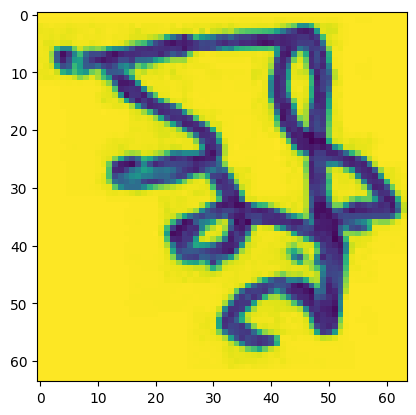

In [285]:
images = getImg(test_df)

In [286]:
len(images)

12

In [307]:
def getPred(img, getIndice=False):
  pred = model.predict(np.expand_dims(img, axis=0))
  grapheme_pred = pred[0]  # Predictions for grapheme
  vowel_pred = pred[1]      # Predictions for vowel
  consonant_pred = pred[2]  # Predictions for consonant

  grapheme_label = np.argmax(grapheme_pred, axis=-1)
  vowel_label = np.argmax(vowel_pred, axis=-1)
  consonant_label = np.argmax(consonant_pred, axis=-1)

  if not getIndice:
    print("Grapheme Prediction:", grapheme[grapheme_label][0][1])
    print("Vowel Prediction:", vowel[vowel_label][0][1])
    print("Consonant Prediction:", consonant[consonant_label][0][1])
  else:
    return grapheme_label[0], vowel_label[0], consonant_label[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Grapheme Prediction: আ
Vowel Prediction: 0
Consonant Prediction: 0


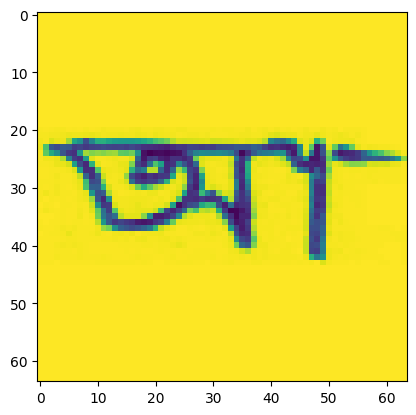

In [308]:
i = random.randint(0, len(images)-1)
img = images[i]
plt.imshow(img)
getPred(img)

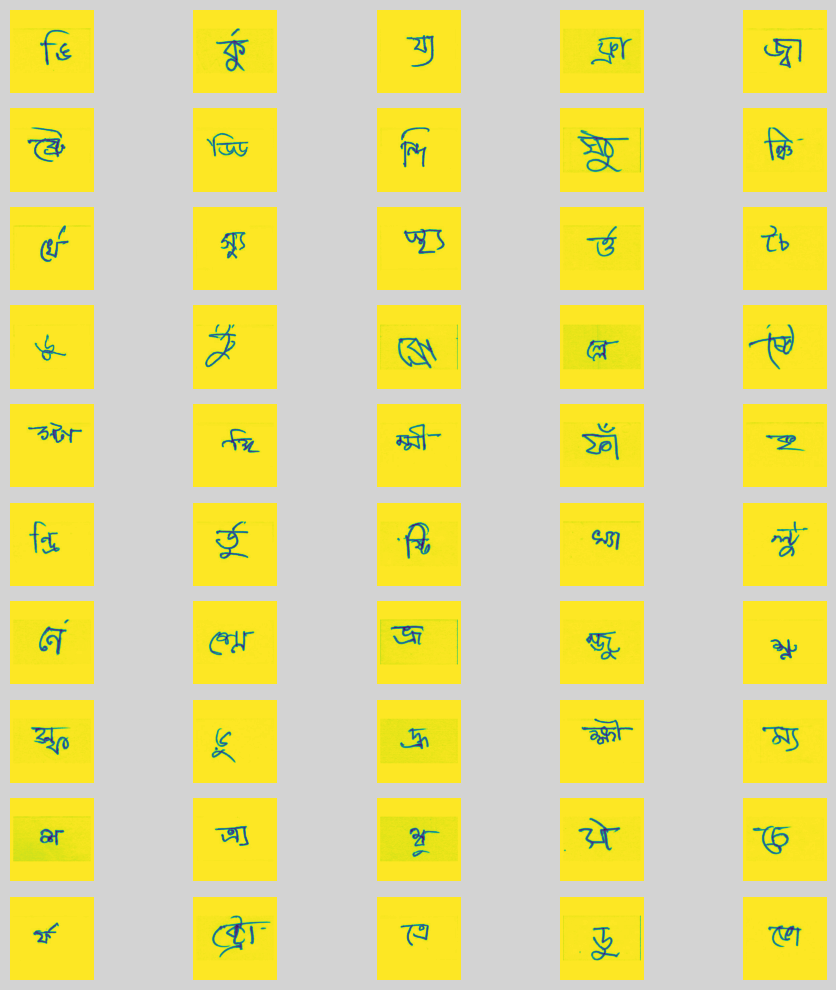

In [289]:
import cv2
import matplotlib.pyplot as plt

# Create a figure and a 10x5 grid of subplots
fig, axes = plt.subplots(10, 5, figsize=(10, 10), facecolor='lightgray')

# Flatten the axes array for easy iteration
axes = axes.ravel()

# Loop through the first 50 images and plot them
for i, (index, row) in enumerate(test.iloc[:50].iterrows()):
    # Load image from filename
    img = cv2.imread(row['filename'])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Display the image with a colormap for grayscale
    axes[i].imshow(img)  # Use cmap='gray' for grayscale images
    axes[i].axis('off')  # Hide axis for each subplot

    # Set the x-axis label with diacritic indices
    axes[i].set_xlabel(f"R: {row['grapheme_root']}, V: {row['vowel_diacritic']}, C: {row['consonant_diacritic']}", fontsize=8, labelpad=2)

# Adjust the layout
plt.tight_layout()
plt.show()

In [290]:
test_images = test['filename']
test_images

,filename
50000,bengaliai/256_train/256/Train_50000.png
50001,bengaliai/256_train/256/Train_50001.png
50002,bengaliai/256_train/256/Train_50002.png
50003,bengaliai/256_train/256/Train_50003.png
50004,bengaliai/256_train/256/Train_50004.png
...,...
99995,bengaliai/256_train/256/Train_99995.png
99996,bengaliai/256_train/256/Train_99996.png
99997,bengaliai/256_train/256/Train_99997.png
99998,bengaliai/256_train/256/Train_99998.png


In [291]:
test_images = np.array(test_images.to_numpy())
test_images

array(['bengaliai/256_train/256/Train_50000.png',
       'bengaliai/256_train/256/Train_50001.png',
       'bengaliai/256_train/256/Train_50002.png', ...,
       'bengaliai/256_train/256/Train_99997.png',
       'bengaliai/256_train/256/Train_99998.png',
       'bengaliai/256_train/256/Train_99999.png'], dtype=object)

In [292]:
testing = []

for i in tqdm(range(len(test_images))):
  img = cv2.imread(test_images[i])
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = crop_object(img, 250)
  img = cv2.resize(img, (64, 64))
  img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  img = img / 255.
  testing.append(img)

100%|██████████| 50000/50000 [01:19<00:00, 629.27it/s]


In [279]:
print(len(testing))
random.shuffle(testing)

50000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Grapheme Prediction: ল্প
Vowel Prediction: ি
Consonant Prediction: 0


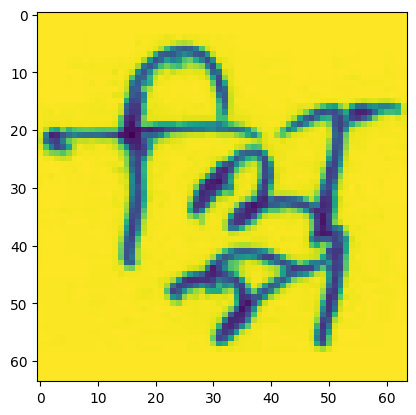

In [310]:
i = random.randint(0, len(testing)-1)
plt.imshow(testing[i])
getPred(testing[i])

In [256]:
test.head()

,filename,grapheme_root,vowel_diacritic,consonant_diacritic
50000,bengaliai/256_train/256/Train_50000.png,31,2,0
50001,bengaliai/256_train/256/Train_50001.png,13,4,2
50002,bengaliai/256_train/256/Train_50002.png,122,0,4
50003,bengaliai/256_train/256/Train_50003.png,103,1,5
50004,bengaliai/256_train/256/Train_50004.png,47,1,0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


<ipython-input-330-c5768d8c7a11>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  path, actual_root, actual_vowel, actual_consonant = row[0], row[1], row[2], row[3]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


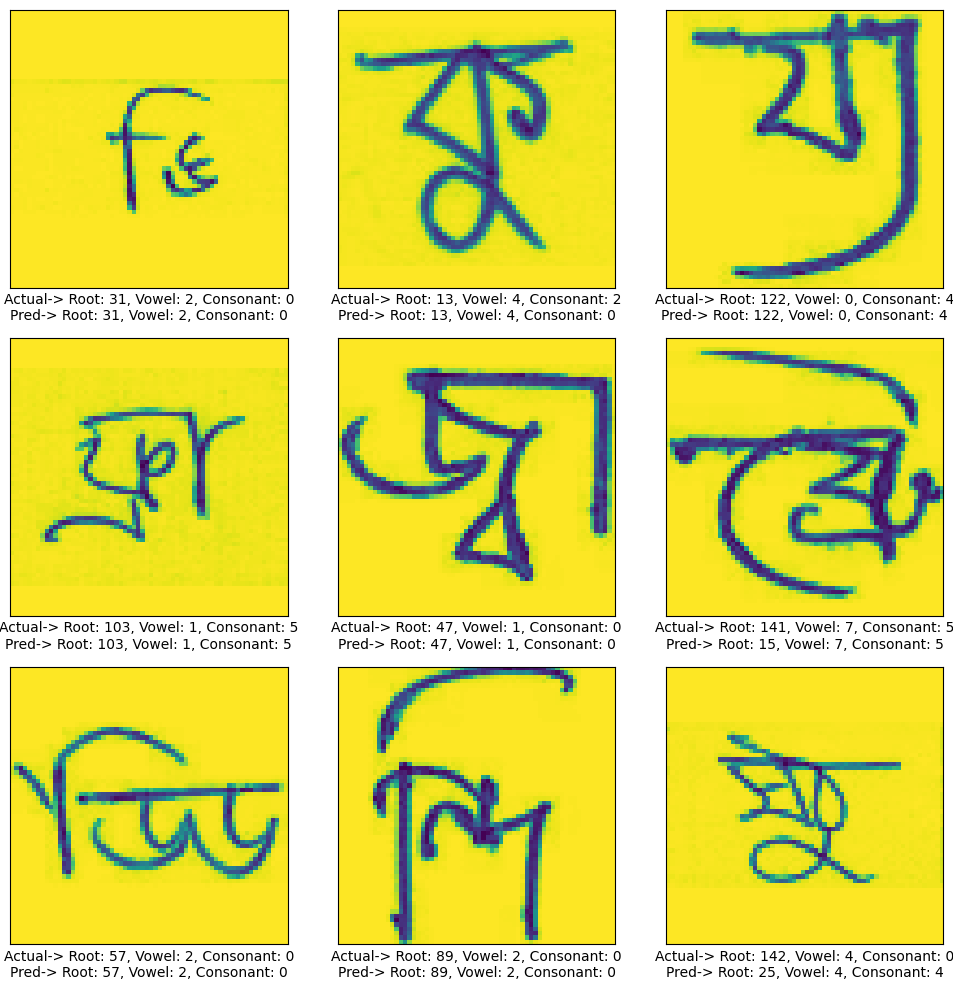

In [330]:
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3, 3, i+1)
  row = test.iloc[i]
  path, actual_root, actual_vowel, actual_consonant = row[0], row[1], row[2], row[3]
  img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
  img = crop_object(img, 250)
  img = cv2.resize(img, (64, 64))
  img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  img = img / 255.
  pred_root, pred_vowel, pred_consonant = getPred(img, True)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(f'Actual-> Root: {actual_root}, Vowel: {actual_vowel}, Consonant: {actual_consonant}\nPred-> Root: {pred_root}, Vowel: {pred_vowel}, Consonant: {pred_consonant}', fontsize=10)
  plt.imshow(img)
plt.tight_layout()
plt.show()